In [169]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import losses

In [29]:
#Preprocessing

In [68]:
(x_train, lbl_train), (x_test, lbl_test) =  tf.keras.datasets.fashion_mnist.load_data()

In [56]:
#Comdense the 28*28 into 
x_train = x_train / 255
x_test = x_test / 255

In [71]:
#Convert into required dimensionality, an image is represented in 28*28*1(depth) (3 means RGB or something else)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

#One-hot encoding: labels(get dummies in pandas)
lbl_train = np_utils.to_categorical(lbl_train)
lbl_test = np_utils.to_categorical(lbl_test)

#lblname = ["top", "trouser", "pullover", "dress", "coat","sandal", "shirt", "sneaker", "bag", "ankle boot"]

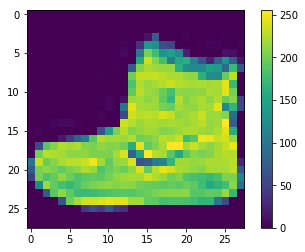

In [83]:
#VIew the figure(first item)
plt.figure()
plt.imshow(np.squeeze(x_train[0]))
#including this parameter could chage color to black or white related--> cmap=plt.cm.binary
#matplotlib drawing the picture with the pixel value automatically
plt.colorbar() 
plt.show()

In [30]:
#Modeling

In [142]:
model = Sequential()

#1st CONV + POOLING
model.add(Conv2D(32,  #output 32 neuron
                 kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = (28, 28, 1))) #Default channel-last. output dim = 28 - 3 + 1 = 26
model.add(MaxPooling2D(pool_size = (2, 2)))

#2nd CONV + POOLING
model.add(Conv2D(64,  #output 64 neuron
                 kernel_size = (3, 3),
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#3rd CONV + POOLING
model.add(Conv2D(128,  #output 64 neuron
                 kernel_size = (3, 3),
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [143]:
model.compile(
              loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [144]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 128)               0         
__________

In [151]:
train_model = model.fit(x_train, lbl_train,
                  epochs = 10,
                  verbose = 1,
                  validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 26s 481us/step - loss: 0.3235 - acc: 0.8804 - val_loss: 0.3506 - val_acc: 0.8735
Epoch 2/10
54000/54000 [==============================] - 26s 479us/step - loss: 0.3016 - acc: 0.8872 - val_loss: 0.3726 - val_acc: 0.8705
Epoch 3/10
54000/54000 [==============================] - 26s 485us/step - loss: 0.2827 - acc: 0.8931 - val_loss: 0.3695 - val_acc: 0.8672
Epoch 4/10
54000/54000 [==============================] - 26s 488us/step - loss: 0.2702 - acc: 0.8978 - val_loss: 0.3802 - val_acc: 0.8715
Epoch 5/10
54000/54000 [==============================] - 26s 487us/step - loss: 0.2542 - acc: 0.9052 - val_loss: 0.3537 - val_acc: 0.8728
Epoch 6/10
54000/54000 [==============================] - 27s 494us/step - loss: 0.2431 - acc: 0.9078 - val_loss: 0.3610 - val_acc: 0.8767
Epoch 7/10
54000/54000 [==============================] - 27s 502us/step - loss: 0.2316 - acc: 0.9128 - val_loss: 0.3

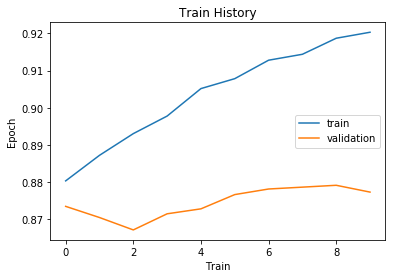

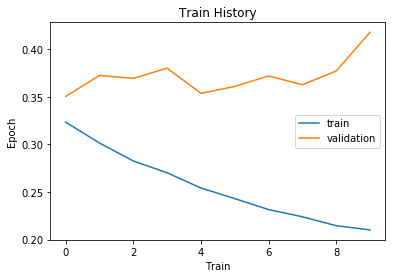

In [152]:
#VIew the training history

def show_train_history(trainh, train, val):
    plt.plot(trainh.history[train])
    plt.plot(trainh.history[val])
    plt.title('Train History')
    plt.xlabel('Train')
    plt.ylabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'center right')
    plt.show()

show_train_history(train_model, 'acc', 'val_acc')
show_train_history(train_model, 'loss', 'val_loss')

In [175]:
prediction = model.predict(x_test, verbose = 1)

10000/10000 [==============================] - 2s 153us/step


In [176]:
#Prediction and truth matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

prediction = np.argmax(prediction, axis = 1)
reverse_lbl_test = np.argmax(lbl_test, axis = 1)

#Print it, uh...plain text is ugly.....so let's check out in pandas.
pd.DataFrame(confusion_matrix(reverse_lbl_test, prediction))
print(accuracy_score(reverse_lbl_test, prediction))

0.8733
